In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [26]:
final_df = pd.read_csv("Final DF.csv")
final_df.columns

Index(['GAME_ID', 'SEASON_ID', 'SEASON_STAGE', 'VISITOR_TEAM_TRI_CODE',
       'HOME_TEAM_TRI_CODE', 'SECTION_CATEGORY', 'SECTION_GROUP',
       'SECTION_LEVEL', 'SECTION_NAME', 'ROW_NAME', 'SEAT_NAME',
       'TICKET_LISTING_PRICE', 'DAYS_INVENTORY_LEAD_TIME',
       'INVENTORY_LEAD_TIME_CATEGORY', 'SEAT_CENTER_X', 'SEAT_CENTER_Y',
       'Home_Win_Percentage', 'Visitor_Win_Percentage'],
      dtype='object')

In [72]:
final_df.describe()
final_normalized_df = (final_df - final_df.mean()) / final_df.std()
final_normalized_df.cov()

,GAME_ID,SEASON_ID,SEASON_STAGE,VISITOR_TEAM_TRI_CODE,HOME_TEAM_TRI_CODE,SECTION_CATEGORY,SECTION_GROUP,SECTION_LEVEL,SECTION_NAME,ROW_NAME,SEAT_NAME,TICKET_LISTING_PRICE,DAYS_INVENTORY_LEAD_TIME,INVENTORY_LEAD_TIME_CATEGORY,SEAT_CENTER_X,SEAT_CENTER_Y,Home_Win_Percentage,Visitor_Win_Percentage
GAME_ID,1.000000,0.999978,NaN,-0.060327,NaN,-0.003475,0.003347,0.002533,0.007535,-0.011595,0.006216,-0.018785,0.016500,0.015612,-0.007127,-0.007439,-0.126623,0.147073
SEASON_ID,0.999978,1.000000,NaN,-0.060909,NaN,-0.003513,0.003357,0.002570,0.007569,-0.011596,0.006215,-0.018790,0.016125,0.015777,-0.007061,-0.007450,-0.126807,0.146883
SEASON_STAGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VISITOR_TEAM_TRI_CODE,-0.060327,-0.060909,NaN,1.000000,NaN,-0.000351,0.000011,0.000067,0.000531,0.001931,-0.000128,-0.035716,-0.034676,0.007348,-0.001875,0.000210,-0.044927,-0.143911
HOME_TEAM_TRI_CODE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SECTION_CATEGORY,-0.003475,-0.003513,NaN,-0.000351,NaN,1.000000,-0.716075,-0.985564,-0.815270,0.175720,-0.004672,0.365704,-0.067499,0.067292,-0.191490,-0.000628,-0.008442,-0.001652
SECTION_GROUP,0.003347,0.003357,NaN,0.000011,NaN,-0.716075,1.000000,0.749423,0.334825,-0.461984,-0.028791,-0.628922,0.078840,-0.080178,0.114239,0.007650,0.007469,0.001882
SECTION_LEVEL,0.002533,0.002570,NaN,0.000067,NaN,-0.985564,0.749423,1.000000,0.766895,-0.209894,-0.001107,-0.436463,0.070666,-0.069454,0.182545,0.002757,0.008922,0.002452
SECTION_NAME,0.007535,0.007569,NaN,0.000531,NaN,-0.815270,0.334825,0.766895,1.000000,0.051695,0.026611,-0.108643,0.036953,-0.036737,0.012743,-0.270650,0.004834,0.001413
ROW_NAME,-0.011595,-0.011596,NaN,0.001931,NaN,0.175720,-0.461984,-0.209894,0.051695,1.000000,0.022403,0.231037,-0.046170,0.040894,-0.058821,-0.038119,-0.002103,0.001669


In [73]:
final_normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454176 entries, 0 to 454175
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   GAME_ID                       454176 non-null  float64
 1   SEASON_ID                     454176 non-null  float64
 2   SEASON_STAGE                  0 non-null       float64
 3   VISITOR_TEAM_TRI_CODE         454176 non-null  float64
 4   HOME_TEAM_TRI_CODE            0 non-null       float64
 5   SECTION_CATEGORY              454176 non-null  float64
 6   SECTION_GROUP                 454176 non-null  float64
 7   SECTION_LEVEL                 454176 non-null  float64
 8   SECTION_NAME                  454176 non-null  float64
 9   ROW_NAME                      454176 non-null  float64
 10  SEAT_NAME                     454176 non-null  float64
 11  TICKET_LISTING_PRICE          454176 non-null  float64
 12  DAYS_INVENTORY_LEAD_TIME      454176 non-nul

In [74]:
final_normalized_df.isna().sum()

GAME_ID                              0
SEASON_ID                            0
SEASON_STAGE                    454176
VISITOR_TEAM_TRI_CODE                0
HOME_TEAM_TRI_CODE              454176
SECTION_CATEGORY                     0
SECTION_GROUP                        0
SECTION_LEVEL                        0
SECTION_NAME                         0
ROW_NAME                             0
SEAT_NAME                            0
TICKET_LISTING_PRICE                 0
DAYS_INVENTORY_LEAD_TIME             0
INVENTORY_LEAD_TIME_CATEGORY         0
SEAT_CENTER_X                        0
SEAT_CENTER_Y                        0
Home_Win_Percentage                  0
Visitor_Win_Percentage               0
dtype: int64

In [76]:
section_price = final_df.groupby(['SECTION_NAME', 'DAYS_INVENTORY_LEAD_TIME']).TICKET_LISTING_PRICE.mean()
section_price = section_price.unstack(level='SECTION_NAME')
section_price

SECTION_NAME,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,71,72,73,75,76
DAYS_INVENTORY_LEAD_TIME,,,,,,,,,,,,,,,,,,,,,
0,172.4,160.750000,120.0,114.294118,73.0,141.309091,164.000000,156.533333,463.114723,212.092314,...,104.866855,95.676868,94.316630,94.984664,96.505618,748.519084,738.183989,680.311024,493.718095,1617.694795
1,251.0,153.571429,113.0,125.250000,170.0,115.805556,140.555556,161.466667,620.954955,266.087031,...,119.214502,105.304482,94.968348,101.698340,101.757576,1028.655340,964.169231,702.032787,638.000000,2234.844611
2,161.2,135.000000,110.0,NaN,NaN,151.562500,114.928571,148.875000,672.586957,285.474432,...,127.389855,116.577528,101.733850,102.300654,106.620253,1212.557971,967.528302,646.258065,766.674157,2711.245098
3,131.0,NaN,NaN,NaN,70.0,163.500000,113.428571,115.625000,730.296296,305.869919,...,127.116935,129.716012,111.305155,108.972136,127.653061,1156.871795,1377.693333,1063.541667,796.492063,2219.186747
4,149.5,136.500000,NaN,NaN,NaN,166.555556,193.538462,208.000000,702.956522,338.294416,...,133.976077,126.100334,112.040598,119.378092,121.164179,1316.918033,1408.565789,801.000000,815.000000,2603.035088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.000000,...,167.333333,158.210526,182.909091,152.571429,164.625000,NaN,NaN,NaN,NaN,NaN
117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227.000000,...,175.200000,137.789474,NaN,100.900000,149.000000,1502.000000,NaN,NaN,NaN,17777.000000
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1087.000000,353.000000,...,209.200000,153.500000,100.000000,NaN,114.000000,1476.000000,NaN,NaN,NaN,NaN


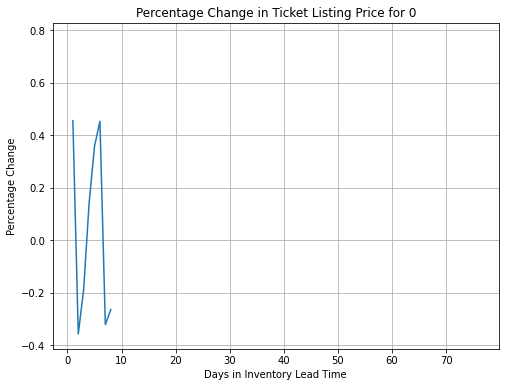

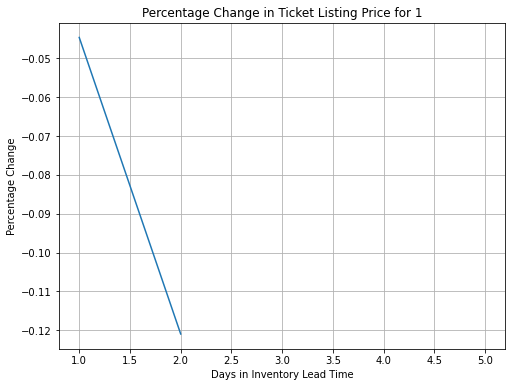

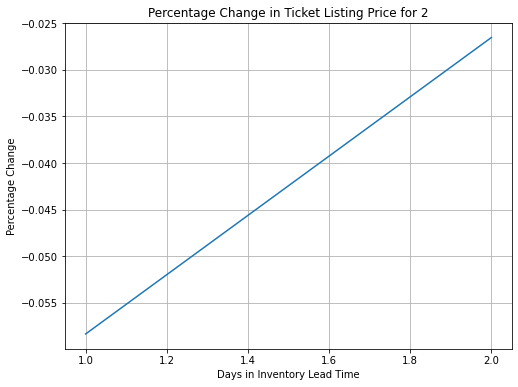

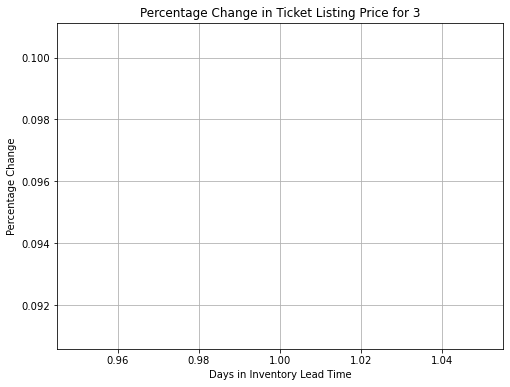

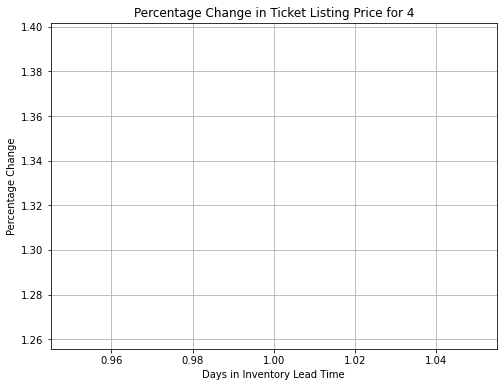

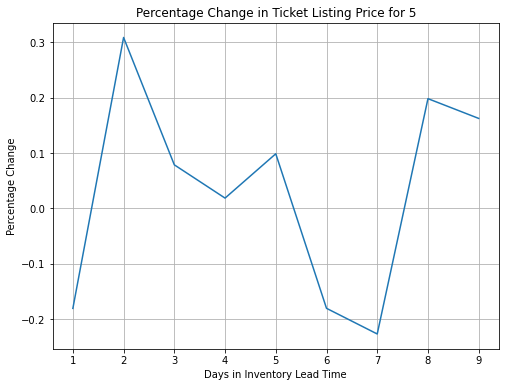

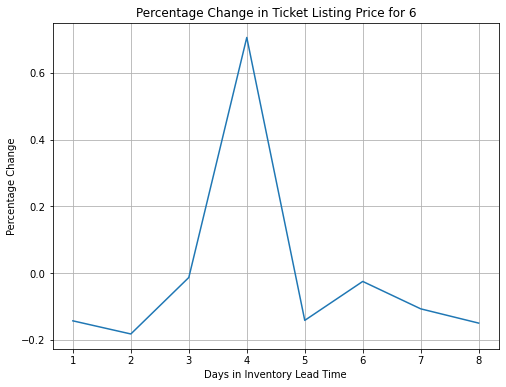

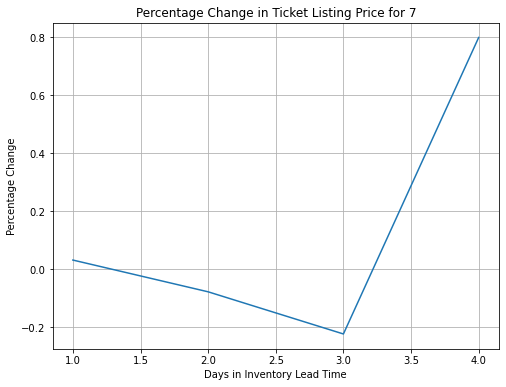

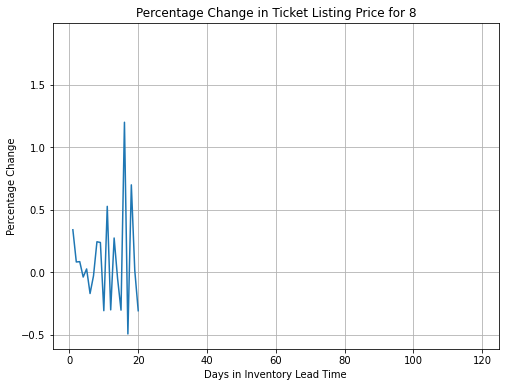

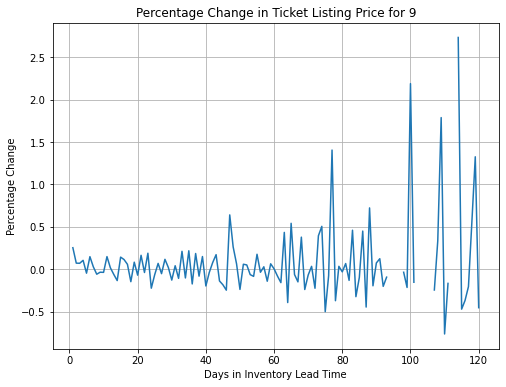

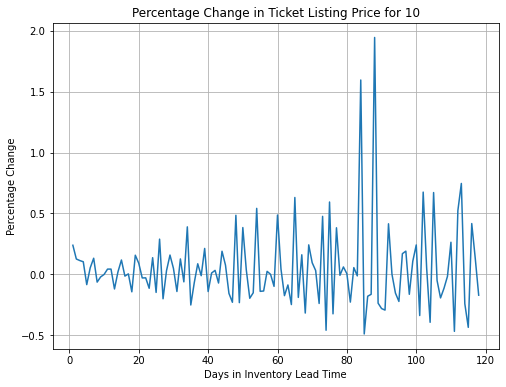

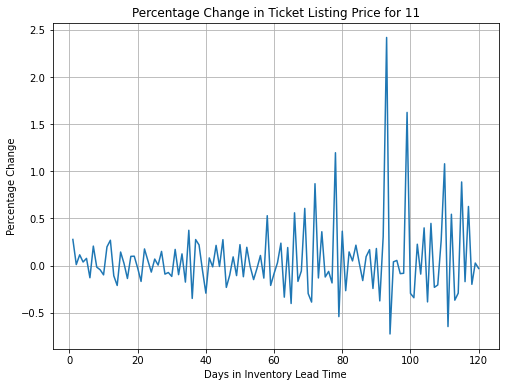

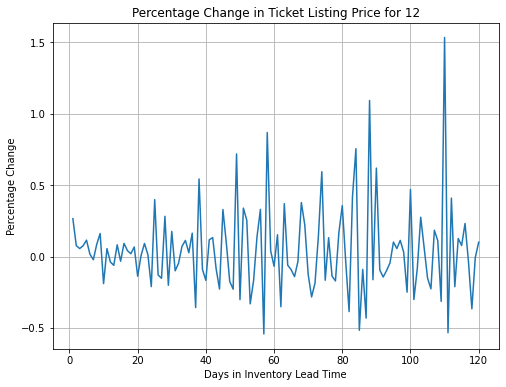

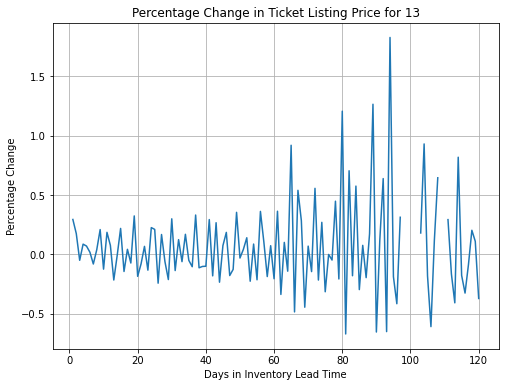

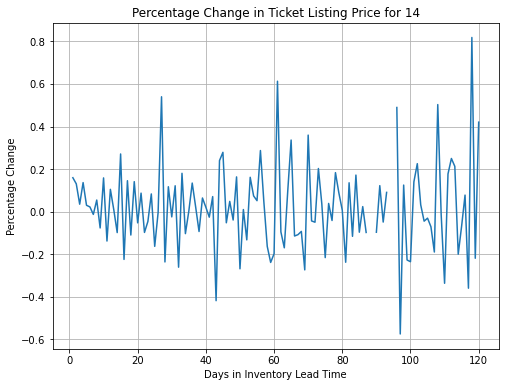

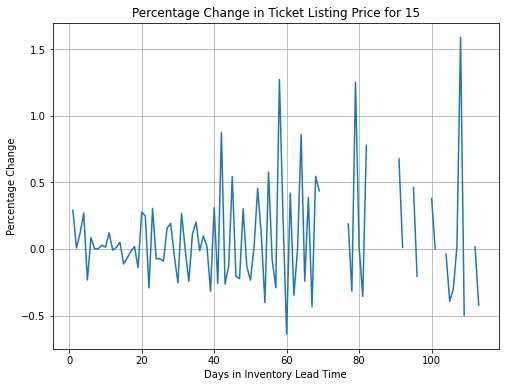

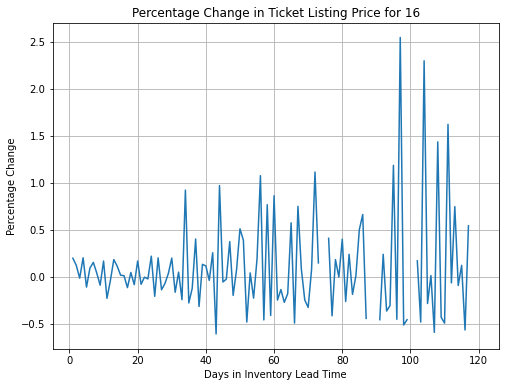

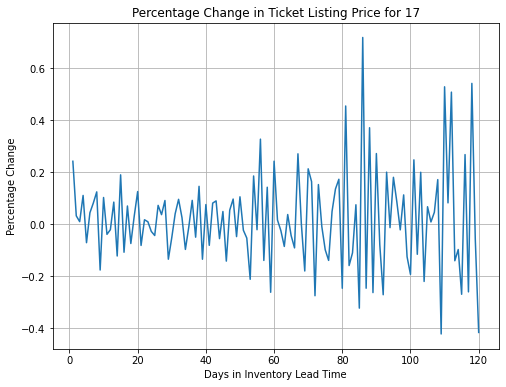

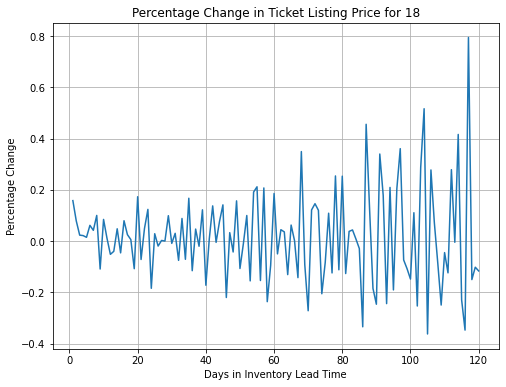

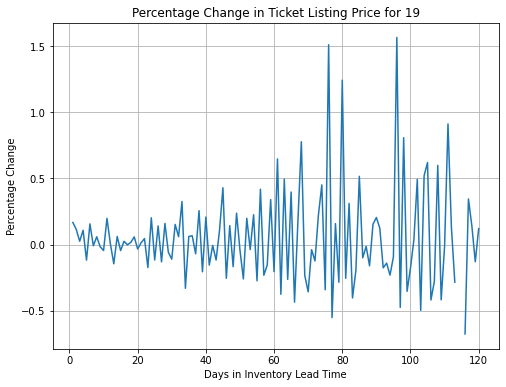

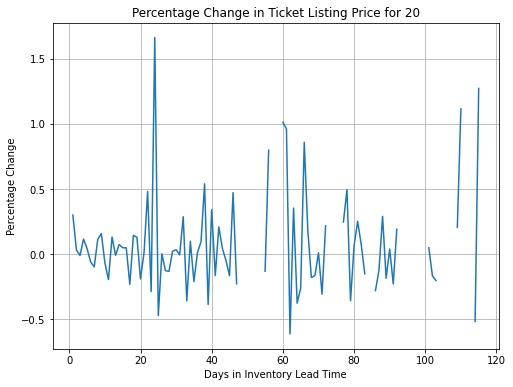

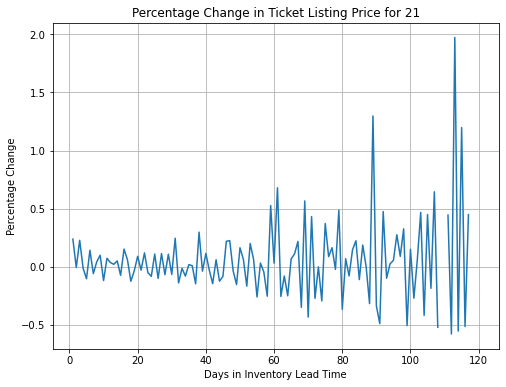

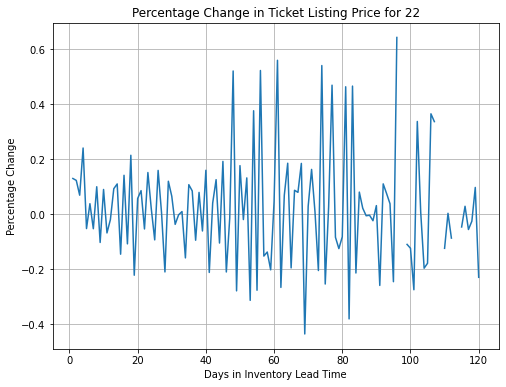

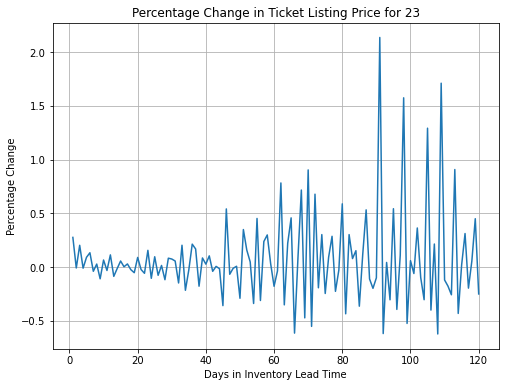

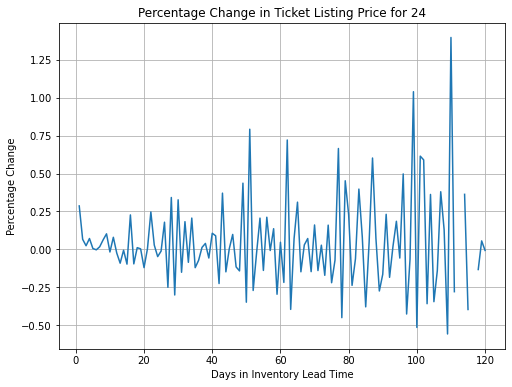

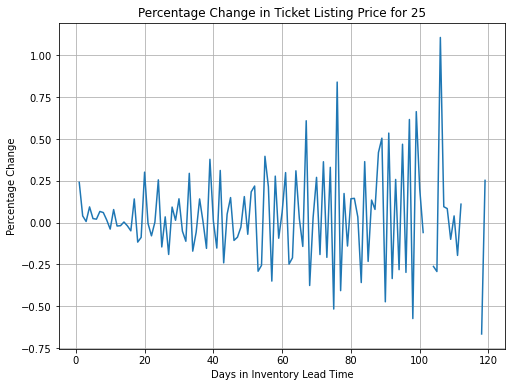

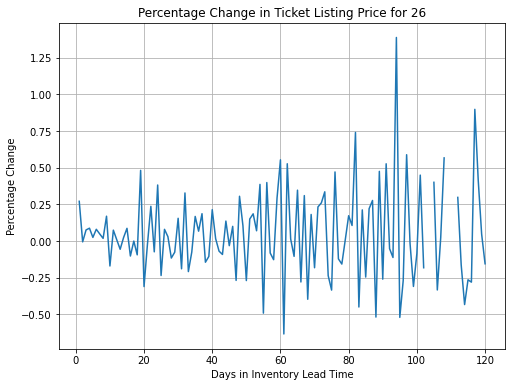

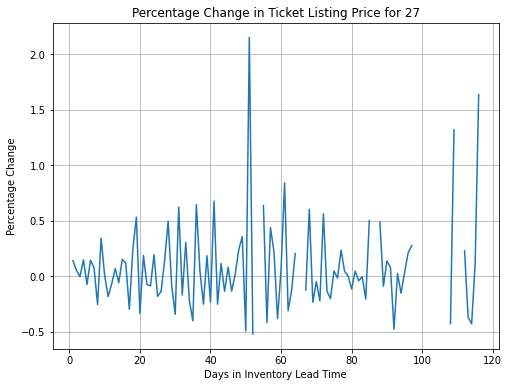

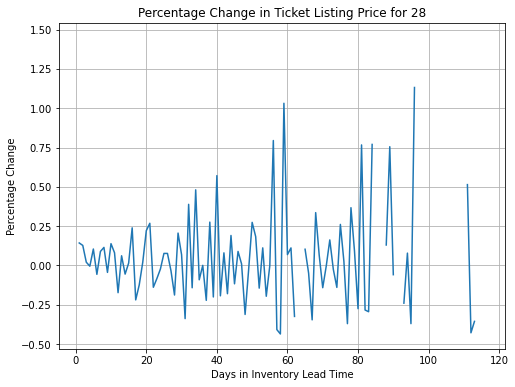

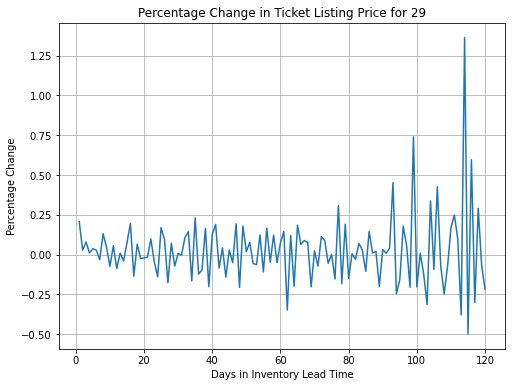

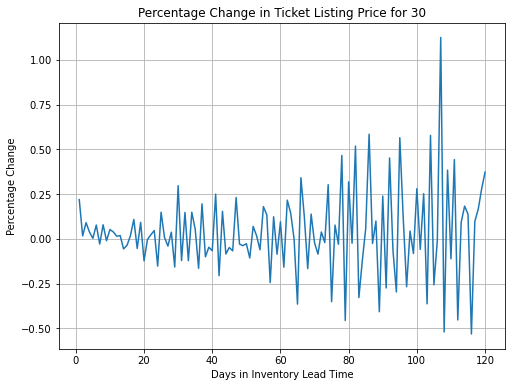

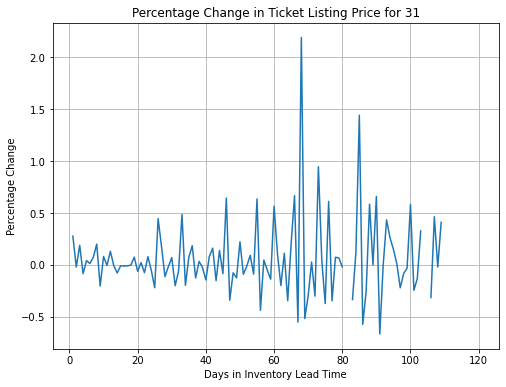

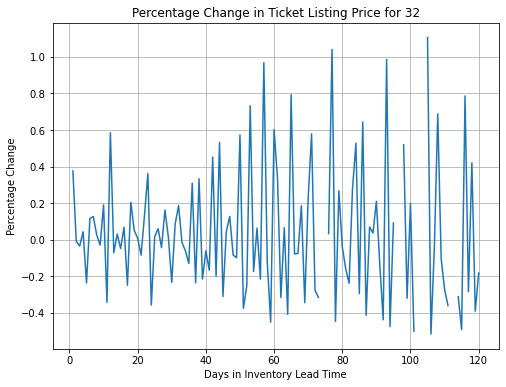

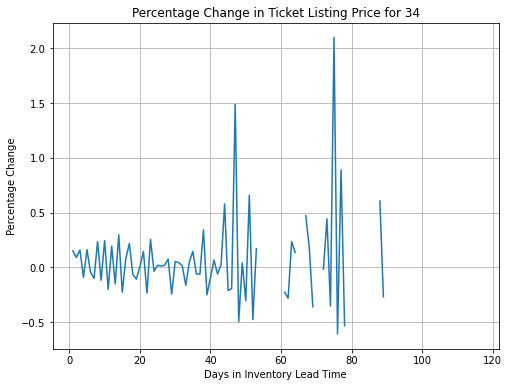

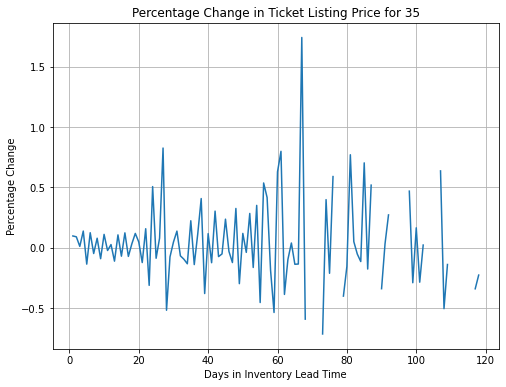

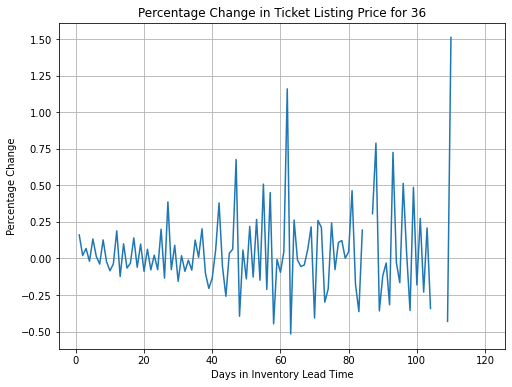

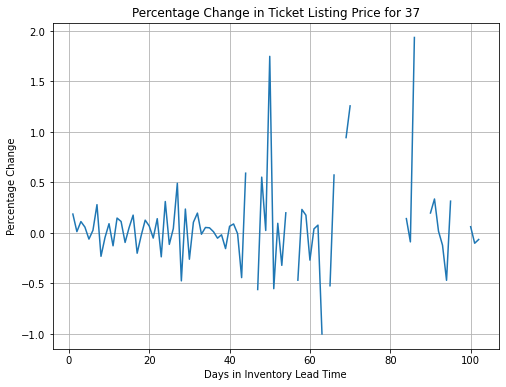

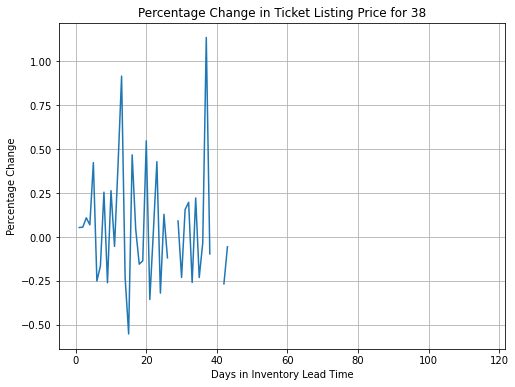

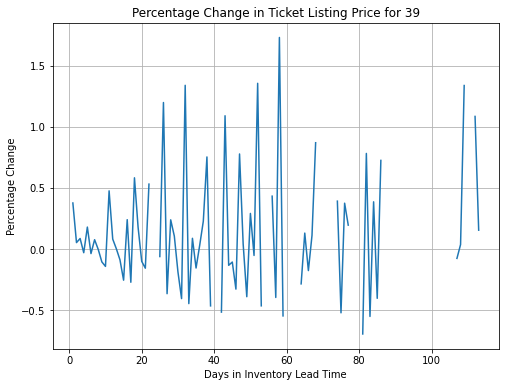

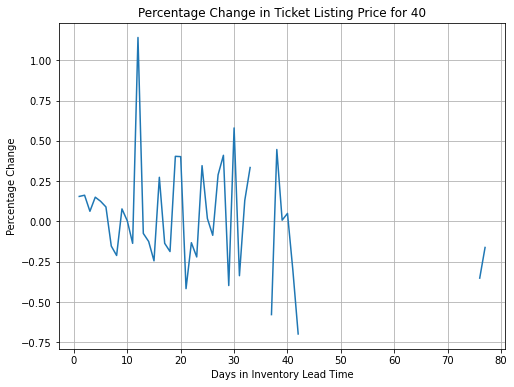

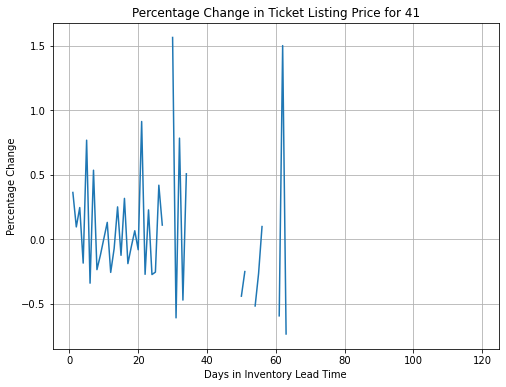

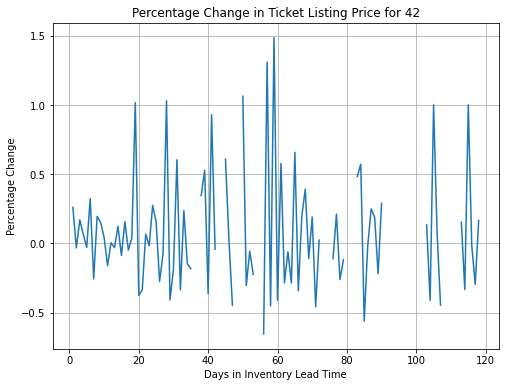

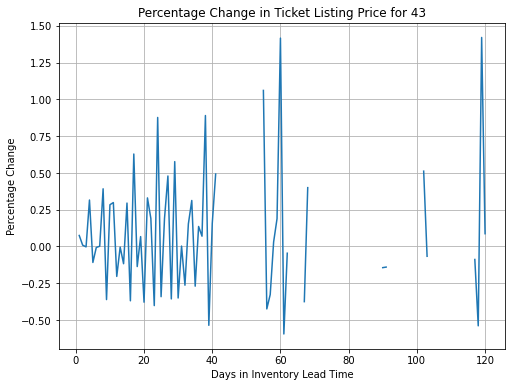

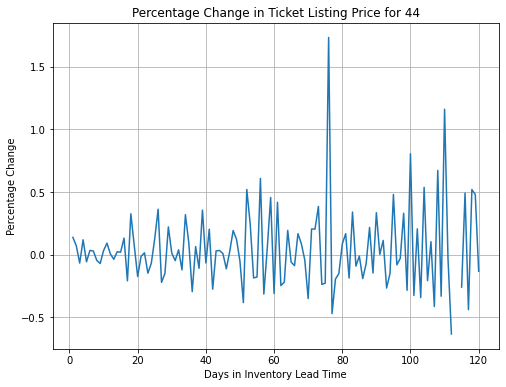

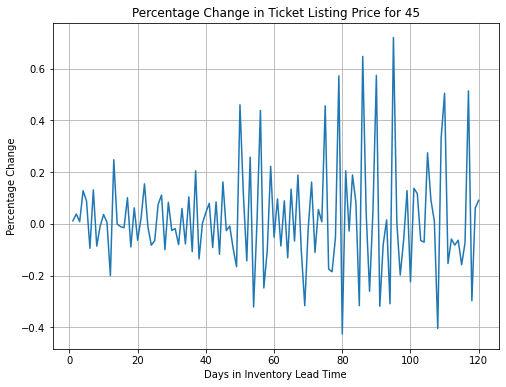

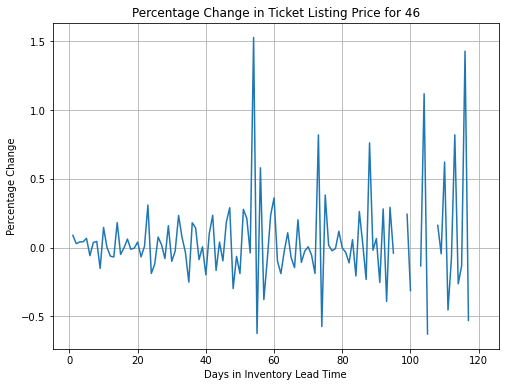

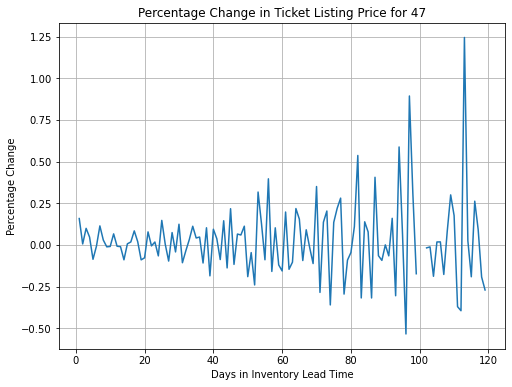

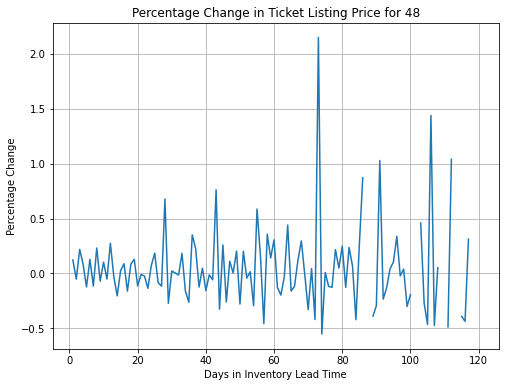

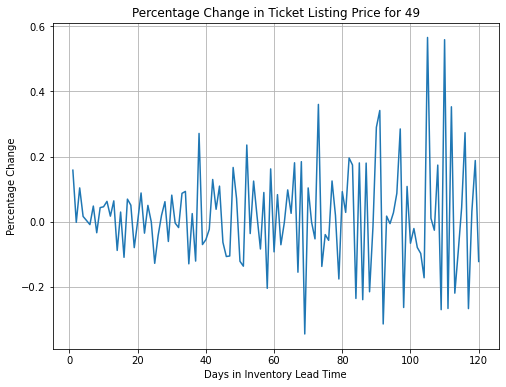

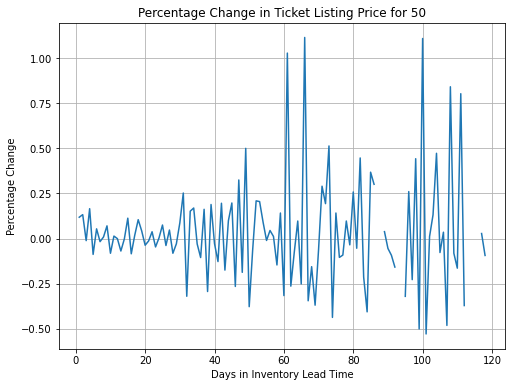

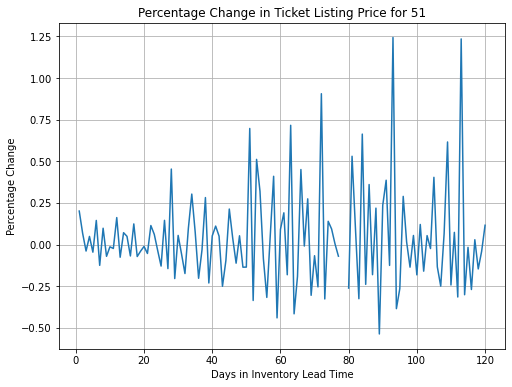

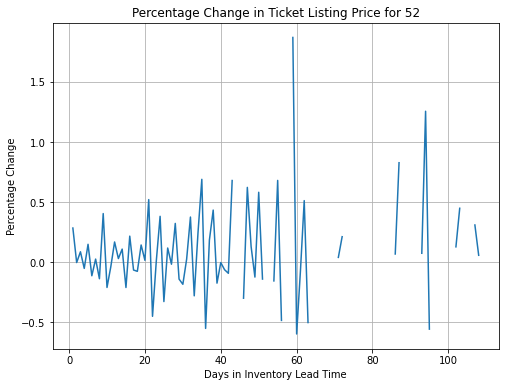

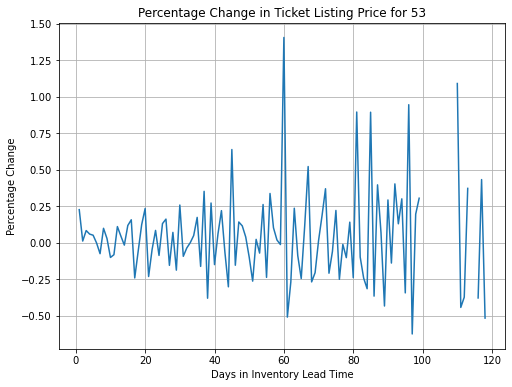

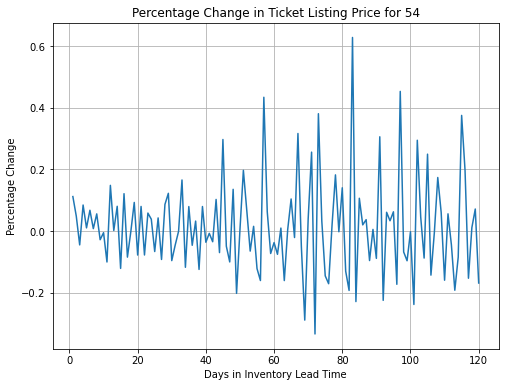

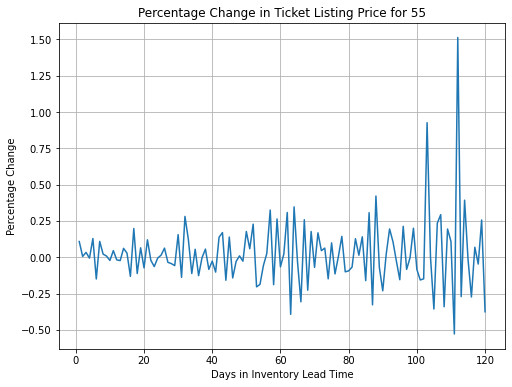

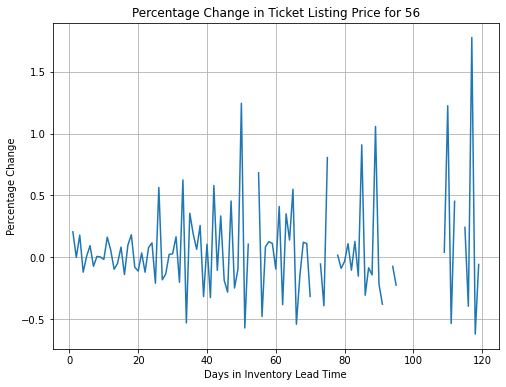

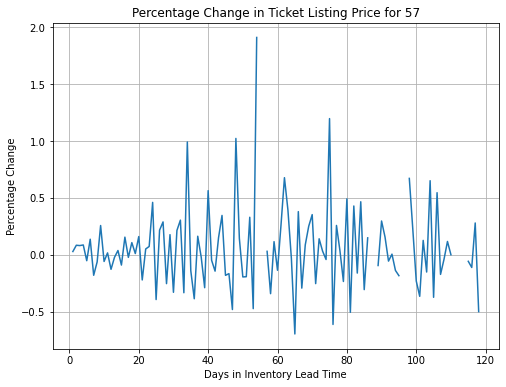

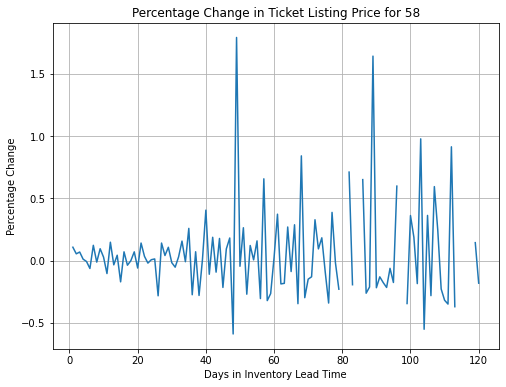

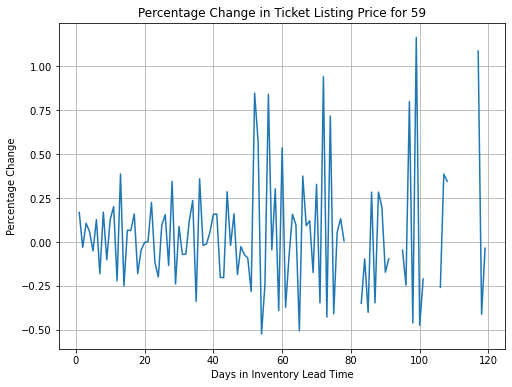

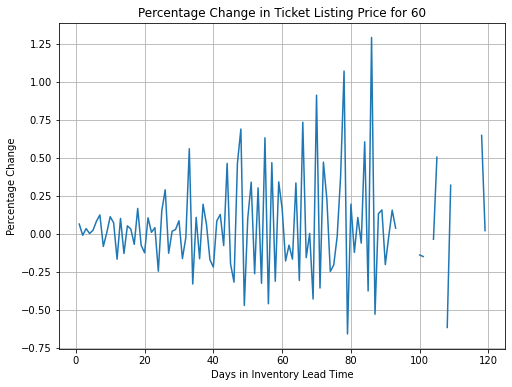

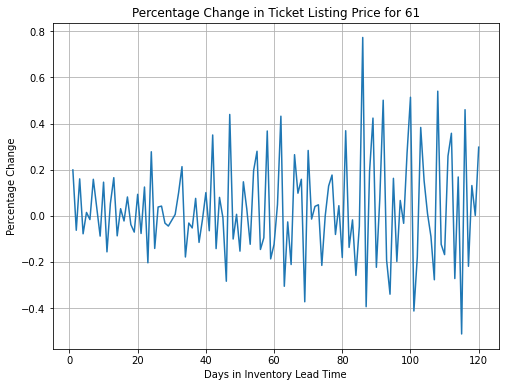

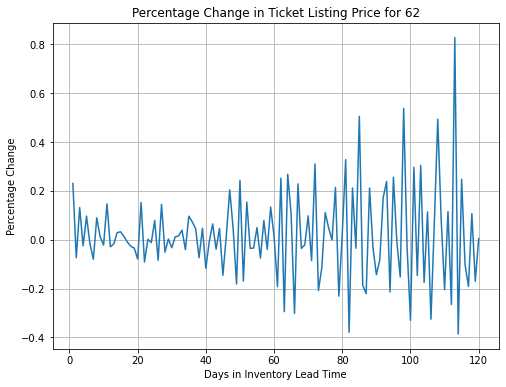

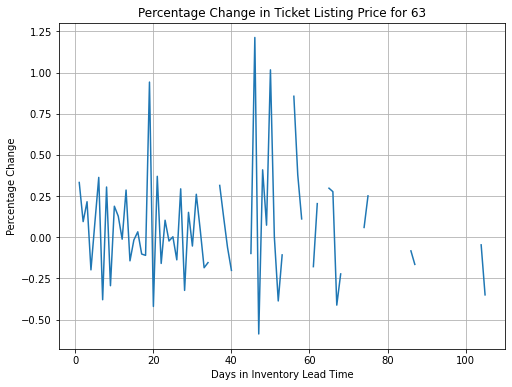

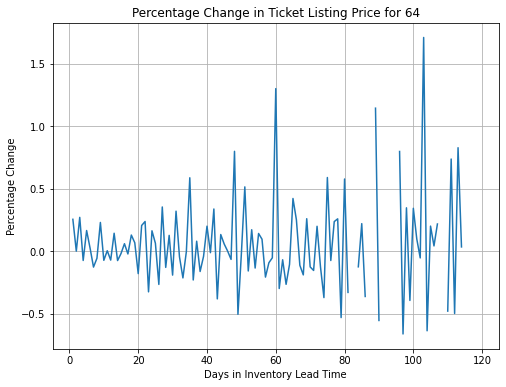

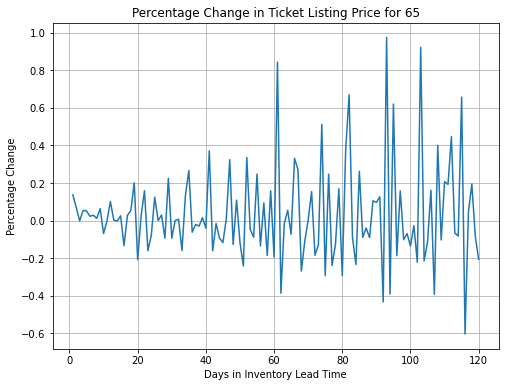

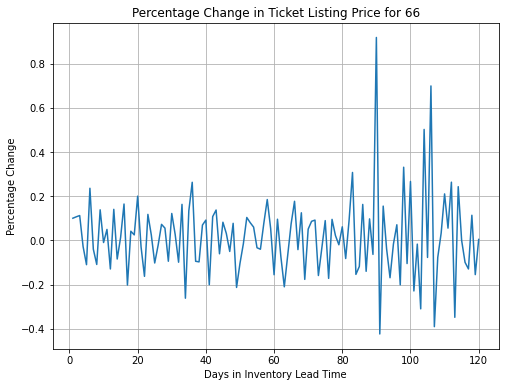

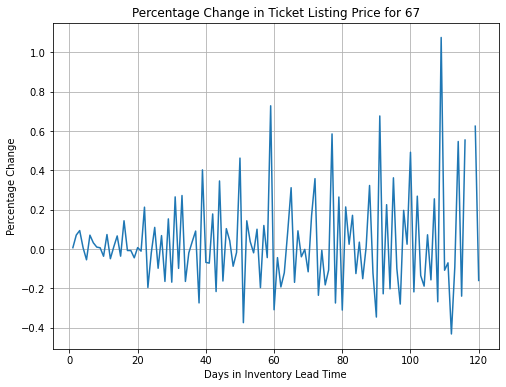

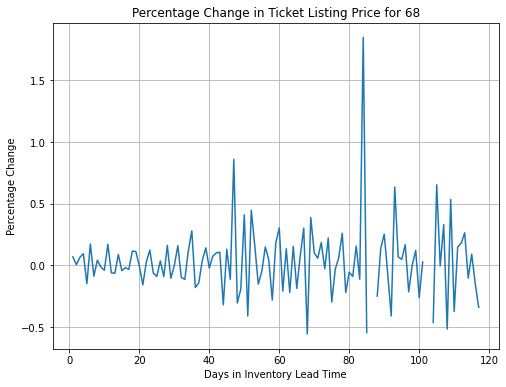

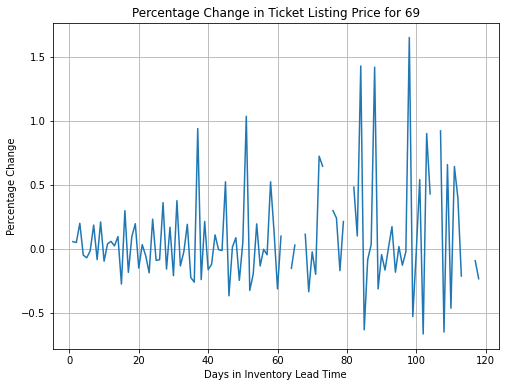

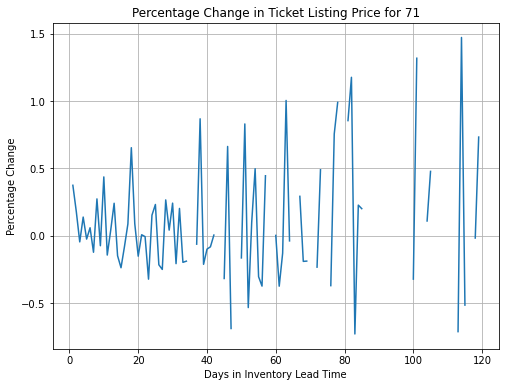

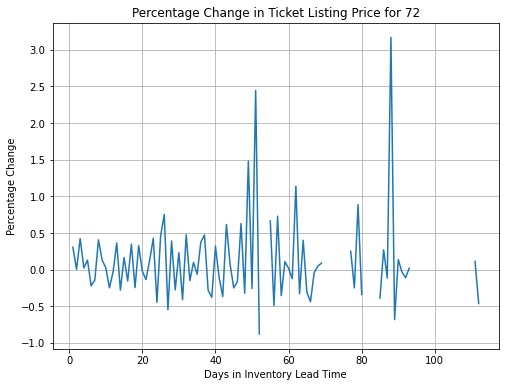

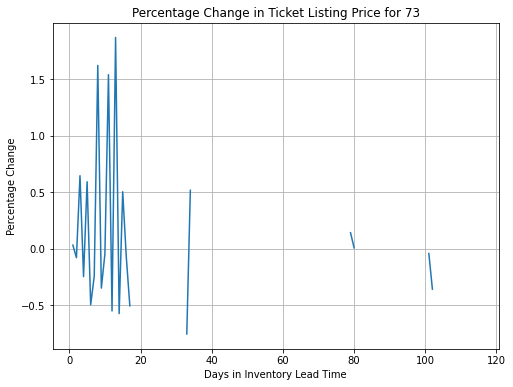

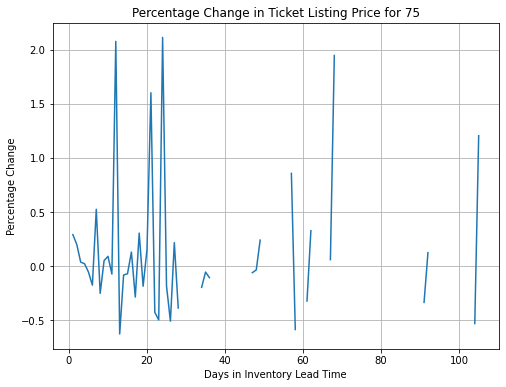

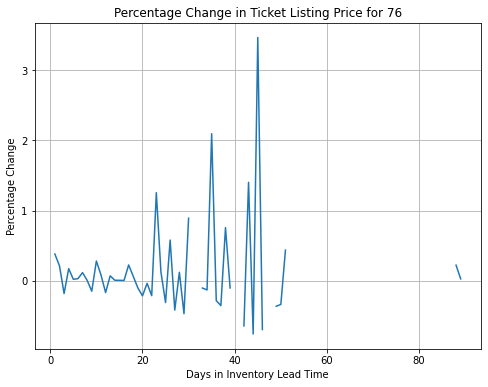

In [77]:
section_price_pct_change = section_price.pct_change(fill_method = None)

# Iterate over each section
for section in section_price_pct_change.columns:
    plt.figure(figsize=(8, 6))
    plt.plot(np.array(section_price_pct_change.index), np.array(section_price_pct_change[section]))
    plt.title(f'Percentage Change in Ticket Listing Price for {section}')
    plt.xlabel('Days in Inventory Lead Time')
    plt.ylabel('Percentage Change')
    plt.grid(True)
    plt.show()

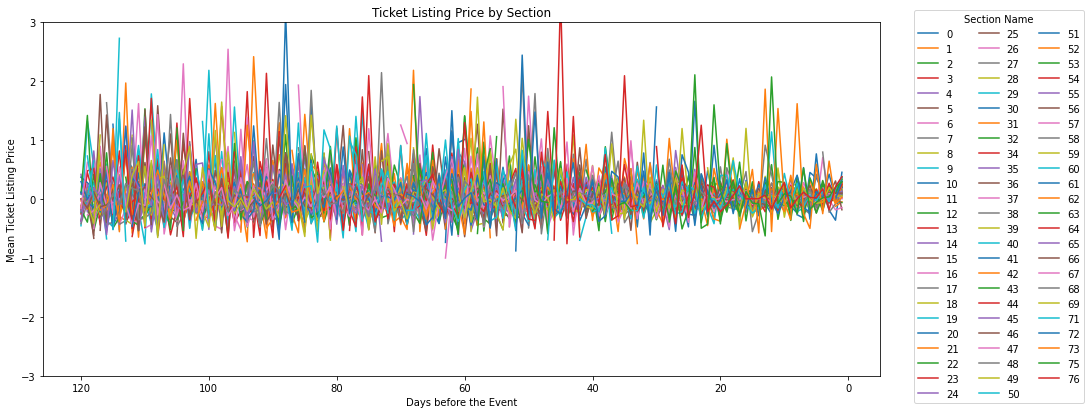

In [78]:
fig, ax = plt.subplots(figsize=(15, 6.5))
ax.plot(section_price_pct_change)

ax.set_xlabel('Days before the Event')
ax.set_ylabel('Mean Ticket Listing Price')
ax.set_ylim([-3, 3])
ax.invert_xaxis()
plt.title('Ticket Listing Price by Section')

ax.legend(section_price_pct_change.columns, title="Section Name", loc='upper right', bbox_to_anchor=(1.25, 1.05), ncol=3)

In [79]:
# Compute the standard deviation of percentage change for each section, excluding NaNs
section_std = section_price_pct_change.std(skipna=True)

# Sort sections by standard deviation in descending order
sorted_sections = section_std.sort_values(ascending=False)

# Get the top 5 sections with the most oscillation
top_5_most_oscillation = sorted_sections.head(5)

# Get the top 5 sections with the least oscillation
top_5_least_oscillation = sorted_sections.tail(5)

print("Top 5 sections with the most oscillation:")
print(top_5_most_oscillation)
print("\nTop 5 sections with the least oscillation:")
print(top_5_least_oscillation)


Top 5 sections with the most oscillation:
SECTION_NAME
76    0.704338
75    0.666599
73    0.664151
72    0.592267
16    0.535316
dtype: float64

Top 5 sections with the least oscillation:
SECTION_NAME
1     0.044022
2     0.022475
3          NaN
4          NaN
37         NaN
dtype: float64


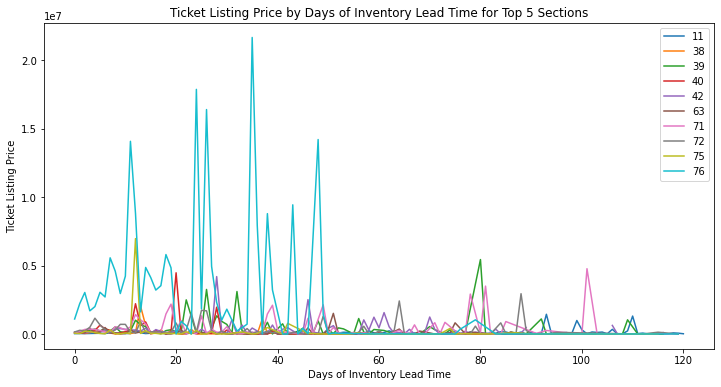

In [43]:
plt.figure(figsize=(12, 6))
for section, data in top_df.groupby('SECTION_NAME'):
    plt.plot(data['DAYS_INVENTORY_LEAD_TIME'].values, data['TICKET_LISTING_PRICE'].values, label=section)

plt.xlabel('Days of Inventory Lead Time')
plt.ylabel('Ticket Listing Price')
plt.title('Ticket Listing Price by Days of Inventory Lead Time for Top 5 Sections')
plt.legend()
plt.show()

In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score


In [90]:
X = final_normalized_df.drop(["TICKET_LISTING_PRICE", "SEASON_ID", "HOME_TEAM_TRI_CODE", "SEASON_STAGE", "GAME_ID"], axis=1)
y = final_normalized_df["TICKET_LISTING_PRICE"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [91]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X_train,y_train)

RandomForestRegressor(oob_score=True, random_state=0)

In [92]:
# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
predictions = regressor.predict(X_test)
 
# Evaluating the model
mse = mean_squared_error(y_test,predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y_test,predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.9422785828372013
Mean Squared Error: 0.04203425829429004
R-squared: 0.9587582718702374


In [93]:
# Access the coefficients (weights) of the model
coefficients = regressor.feature_importances_

# Match coefficients with feature names
feature_names = X.columns

# Print the coefficient for each feature
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

VISITOR_TEAM_TRI_CODE: 0.03927442330976428
SECTION_CATEGORY: 0.00030692458516169626
SECTION_GROUP: 0.348796971097382
SECTION_LEVEL: 0.004710140063548823
SECTION_NAME: 0.09593357731839801
ROW_NAME: 0.14674689451252473
SEAT_NAME: 0.016458746598007595
DAYS_INVENTORY_LEAD_TIME: 0.11612752447571477
INVENTORY_LEAD_TIME_CATEGORY: 0.008176716732196486
SEAT_CENTER_X: 0.04968933597282793
SEAT_CENTER_Y: 0.02975395912393618
Home_Win_Percentage: 0.07286700786586377
Visitor_Win_Percentage: 0.0711577783446737


In [94]:
#adding random feature selection: sqrt
rf_regressor = RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=42, oob_score=True)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', oob_score=True, random_state=42)

In [95]:
# Access the OOB Score
oob_score = rf_regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
predictions = rf_regressor.predict(X_test)
 
# Evaluating the model
mse = mean_squared_error(y_test,predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y_test,predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.9367727691555952
Mean Squared Error: 0.05378172627025759
R-squared: 0.9472322951993523


In [96]:
# Access the coefficients (weights) of the model
coefficients = rf_regressor.feature_importances_

# Match coefficients with feature names
feature_names = X.columns

# Print the coefficient for each feature
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

VISITOR_TEAM_TRI_CODE: 0.04654015698885918
SECTION_CATEGORY: 0.029032159077967454
SECTION_GROUP: 0.1489199202911504
SECTION_LEVEL: 0.0768453660390335
SECTION_NAME: 0.145853873948182
ROW_NAME: 0.17305427247415167
SEAT_NAME: 0.026188765178807943
DAYS_INVENTORY_LEAD_TIME: 0.07378748659527512
INVENTORY_LEAD_TIME_CATEGORY: 0.0443543228014588
SEAT_CENTER_X: 0.060453752674405746
SEAT_CENTER_Y: 0.050065631178397865
Home_Win_Percentage: 0.06298560589811358
Visitor_Win_Percentage: 0.0619186868541967


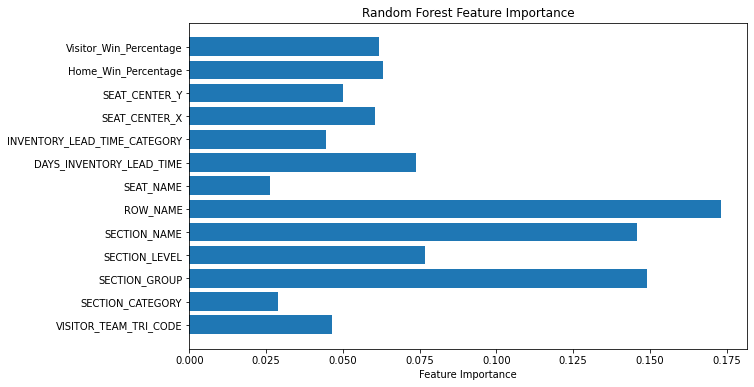

In [97]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(rf_regressor.feature_importances_)), rf_regressor.feature_importances_, tick_label=X.columns)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

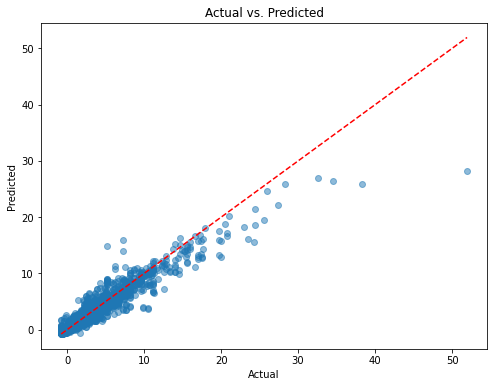

In [98]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

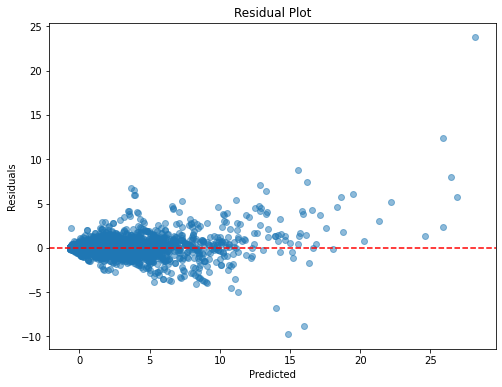

In [99]:
plt.figure(figsize=(8, 6))
plt.scatter(predictions, y_test - predictions, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
#import shap

In [103]:
"""# Create an explainer object
explainer = shap.Explainer(model, X_train)

# Generate Shapley values for your dataset
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type='bar')
"""

NameError: name 'shap' is not defined